In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('onlinefraud.csv')
data.drop('isFlaggedFraud',axis=1,inplace=True)

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4464975 entries, 0 to 4464974
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
dtypes: float64(6), int64(1), object(3)
memory usage: 340.7+ MB


In [4]:
#Cheking for Null values

data.isnull().sum()
data.dropna(inplace=True)

In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [6]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,4.464974e+06,4.464974e+06,4.464974e+06,4.464974e+06,4.464974e+06,4.464974e+06,4.464974e+06
mean,1.740984e+02,1.748214e+05,8.401710e+05,8.617523e+05,1.036974e+06,1.162679e+06,8.159062e-04
std,9.607639e+01,6.238363e+05,2.912697e+06,2.949285e+06,2.848764e+06,3.221679e+06,2.855242e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+02,1.283180e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.860000e+02,7.500452e+04,1.422100e+04,0.000000e+00,1.352707e+05,2.178641e+05,0.000000e+00
75%,2.530000e+02,2.083236e+05,1.082405e+05,1.465191e+05,9.406875e+05,1.113339e+06,0.000000e+00
max,3.240000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.249151e+08,3.555534e+08,1.000000e+00


In [7]:
data.head()
#data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [8]:
# type of transaction present
type_transaction = data["type"].value_counts()
transaction = type_transaction.index
quantity = type_transaction.values

# plotting pie chart
fig = px.pie(data,
            values = quantity,
            names = transaction,
            hole = 0.4,
            title = "Distribution of Transaction Type")
fig.show()

In [9]:
#Checking for co relataion between the features with isFraud column
corr = data.corr()
corr["isFraud"].sort_values(ascending=False)

<ipython-input-9-7a3487ef9a1c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.000000
amount            0.054619
oldbalanceOrg     0.006002
newbalanceDest   -0.000150
step             -0.004171
oldbalanceDest   -0.005858
newbalanceOrig   -0.007484
Name: isFraud, dtype: float64

In [10]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 6


<Axes: xlabel='type', ylabel='count'>

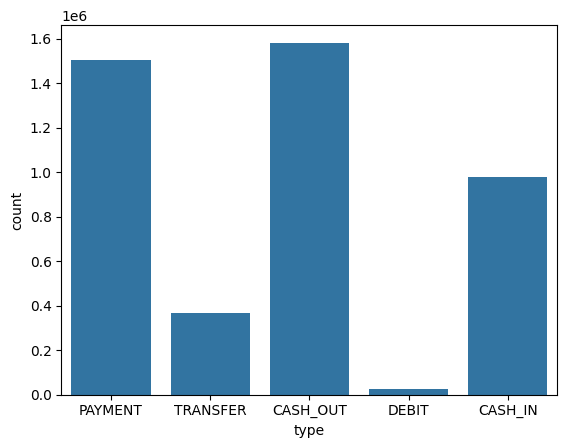

In [11]:
sns.countplot(x='type', data=data)  # for Type and amount column

In [12]:
data['isFraud'].value_counts()

0.0    4461331
1.0       3643
Name: isFraud, dtype: int64

<ipython-input-13-d1bba932735e>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='step', ylabel='Density'>

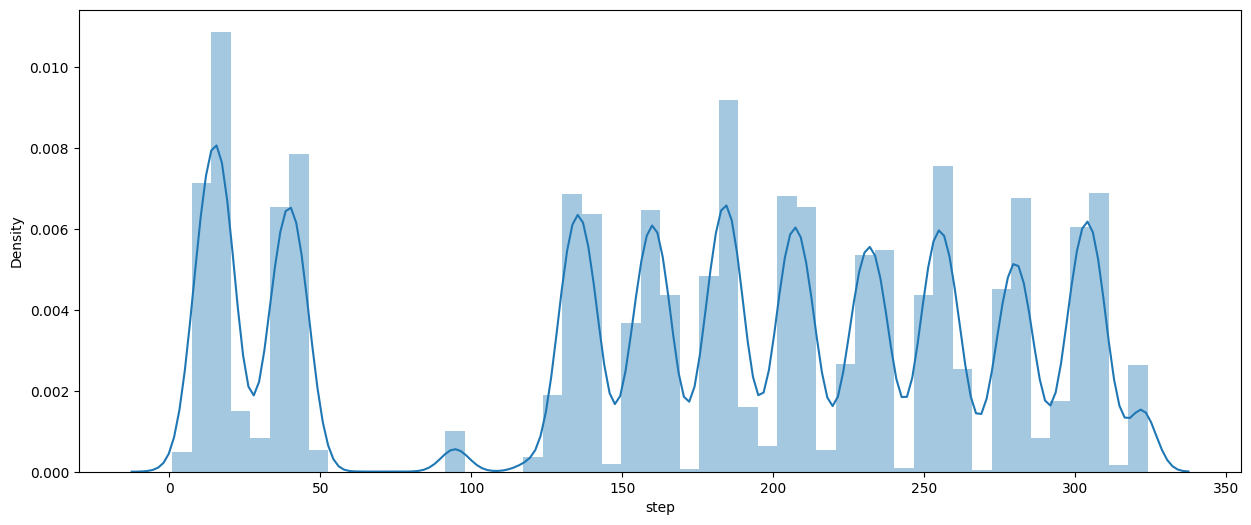

In [13]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<ipython-input-14-b69deaa7993a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

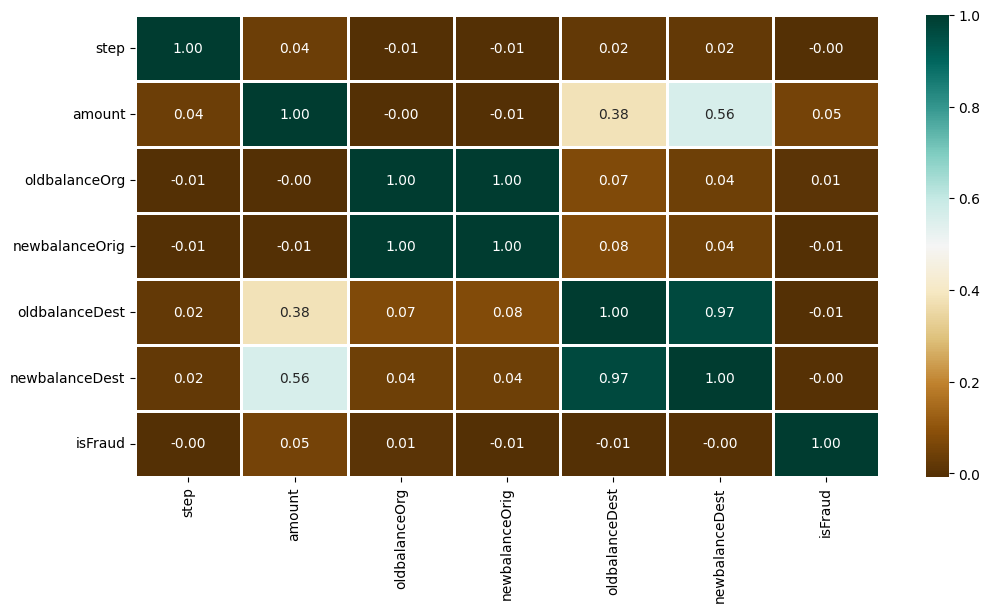

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [15]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0,0,1,0


In [16]:
Xr = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
yr = data_new['isFraud']


In [22]:
'''from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
Xr.shape, yr.shape

smote = SMOTE(random_state=42)
X, y = smote.fit_resample(Xr, yr)'''

'from imblearn.over_sampling import SMOTE\nfrom sklearn.datasets import make_classification\nXr.shape, yr.shape\n\nsmote = SMOTE(random_state=42)\nX, y = smote.fit_resample(Xr, yr)'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [ ]:
#y_train['isFraud'].value_counts()

m=y_train.value_counts()
n=y_test.value_counts()

print(m)
print(n)

0.0    2603487
1.0       2265
Name: isFraud, dtype: int64
0.0    1115869
1.0        882
Name: isFraud, dtype: int64


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
models = [LogisticRegression(), XGBClassifier(),
		SVC(kernel='rbf', probability=True),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_train, y_train)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_train)[:, 1]
	print('Training Accuracy : ', ras(y_train, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression() : 
Training Accuracy :  0.9267932438421642
Validation Accuracy :  0.921220388094508

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.999966213846985
Validation Accuracy :  0.99900068427192

